In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Simple ANN from scratch

In [ ]:

# Generate a synthetic binary classification dataset
np.random.seed(40)
n_samples = 100

In [2]:
# Class 0 : centered at (2,2)
class0 = np.random.randn(n_samples//2,2) + np.array([2,2])

# Class 1 : centered at (4,4)
class1 = np.random.randn(n_samples//2,2) + np.array([4,4])

In [3]:
X = np.vstack((class0, class1))
y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

In [4]:
# Add bias term (x0 = 1)
X_bias = np.c_[np.ones((n_samples,1)),X]

In [5]:
# 2. Initialize perceptron weights (w0 = bias, w1, w2)
weights = np.zeros(X_bias.shape[1])
learning_rate = 0.1
epochs = 20
errors_per_epoch = []

In [6]:
# 3. Perceptron training loop
for epoch in range(epochs):
  errors = 0
  for xi, target in zip(X_bias,y):
    # Step activation function
    prediction = 1 if np.dot(xi,weights) >= 0 else 0
    update = learning_rate * (target - prediction)
    weights += update * xi
    errors += int(update != 0.0)
  errors_per_epoch.append(errors)
  print(f"Epoch {epoch+1}/{epochs} - Miscalassification: {errors}")

Epoch 1/20 - Miscalassification: 2
Epoch 2/20 - Miscalassification: 3
Epoch 3/20 - Miscalassification: 2
Epoch 4/20 - Miscalassification: 3
Epoch 5/20 - Miscalassification: 2
Epoch 6/20 - Miscalassification: 3
Epoch 7/20 - Miscalassification: 4
Epoch 8/20 - Miscalassification: 3
Epoch 9/20 - Miscalassification: 3
Epoch 10/20 - Miscalassification: 4
Epoch 11/20 - Miscalassification: 3
Epoch 12/20 - Miscalassification: 3
Epoch 13/20 - Miscalassification: 4
Epoch 14/20 - Miscalassification: 4
Epoch 15/20 - Miscalassification: 2
Epoch 16/20 - Miscalassification: 2
Epoch 17/20 - Miscalassification: 2
Epoch 18/20 - Miscalassification: 3
Epoch 19/20 - Miscalassification: 2
Epoch 20/20 - Miscalassification: 2


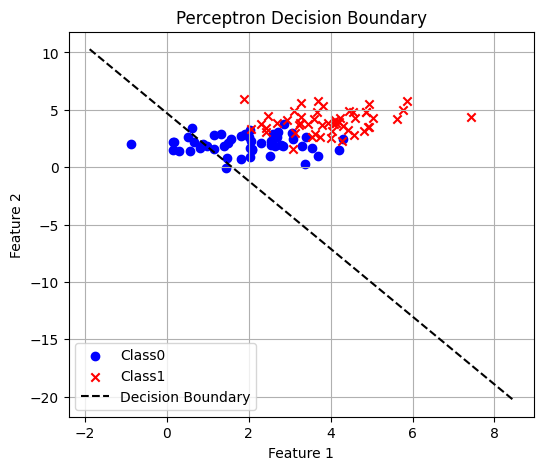

In [7]:
# 4. Decision boundary function
def plot_decision_boundary(X, y, weights):
  plt.figure(figsize=(6,5))
  # Scatter plot of points
  plt.scatter(X[y==0, 0], X[y==0, 1], color='blue',marker='o',label="Class0")
  plt.scatter(X[y==1, 0], X[y==1, 1], color='red',marker='x',label="Class1")

  # Compute line: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1 * x1)/w2
  # Handle the case where weights[2] is zero to avoid division by zero
  if weights[2] != 0:
      x1_vals = np.linspace(X[:,0].min()-1,X[:,0].max()+1,100)
      x2_vals = -(weights[0] + weights[1]*x1_vals) / weights[2]
      plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
  else:
      # If weights[2] is zero, the boundary is a vertical line
      plt.axvline(-weights[0]/weights[1] if weights[1] != 0 else 0, color='k', linestyle='--', label='Decision Boundary')


  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.legend()
  plt.title("Perceptron Decision Boundary")
  plt.grid(True)
  plt.show()

plot_decision_boundary(X, y, weights)

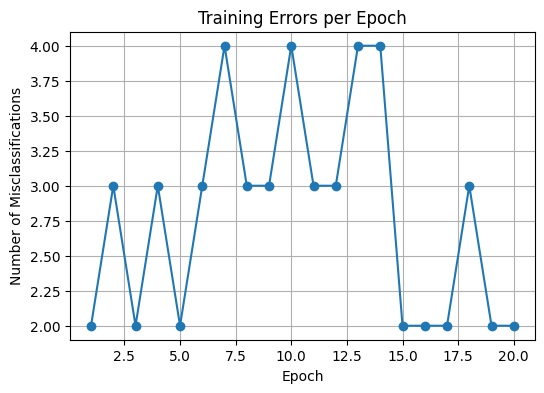

In [8]:
# 6. Plot training errors per epoch
plt.figure(figsize=(6,4))
plt.plot(range(1,epochs+1), errors_per_epoch, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Number of Misclassifications")
plt.title("Training Errors per Epoch")
plt.grid(True)
plt.show()